# Import Library and import files

Data collection method: web scraping
Data is pre-cleaned

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error


train = pd.read_csv("C:/Users/user/OneDrive/Desktop/condo_train.csv")
test = pd.read_csv("C:/Users/user/OneDrive/Desktop/condo_test.csv")
train

,id,price,room,bath,size,gym,parking,pool,library,club,CBD
0,10001,134272.73,1,1,52.00,1,1,1,0,0,1
1,10002,114297.82,1,1,34.99,1,0,1,0,0,1
2,10003,64316.15,2,2,98.00,1,0,1,0,0,1
3,10004,106245.32,1,1,45.70,1,0,1,0,0,1
4,10005,175187.95,2,2,97.00,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1595,11596,78289.57,0,1,22.00,1,1,1,0,0,0
1596,11597,148638.65,1,2,70.00,1,1,1,0,0,0
1597,11598,175892.86,2,2,80.00,1,1,1,0,0,1
1598,11599,79545.45,1,1,32.00,1,0,1,0,0,0


In [2]:
print(train.isnull().sum())
print("Duplicated: ",train["id"].duplicated().sum())

id         0
price      0
room       0
bath       0
size       0
gym        0
parking    0
pool       0
library    0
club       0
CBD        0
dtype: int64
Duplicated:  0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

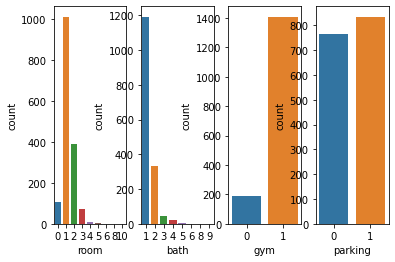

In [3]:
Features = ['room','bath','gym','parking','pool','library','club','CBD']
  
room = train['room']
bath = train['bath']
gym = train['gym']
parking = train['parking']


fig, ax =plt.subplots(1,4)
sns.countplot(room, ax=ax[0])
sns.countplot(bath, ax=ax[1])
sns.countplot(gym, ax=ax[2])
sns.countplot(parking, ax=ax[3])

fig.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pool', ylabel='count'>

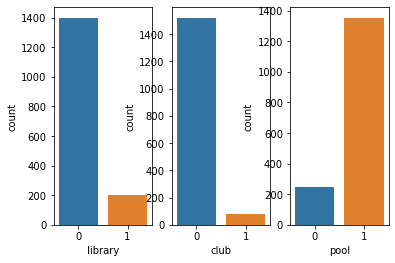

In [4]:
pool = train['pool']
library = train['library']
club = train['club']

fig, ax =plt.subplots(1,3)
sns.countplot(library, ax=ax[0])
sns.countplot(club, ax=ax[1])
sns.countplot(pool, ax=ax[2])

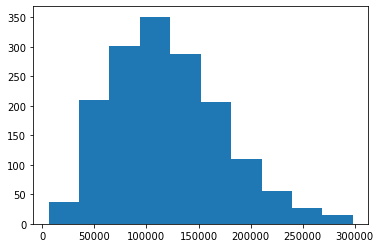

In [5]:
price_range = train["price"]

plt.hist(price_range)
plt.show() 

In [6]:
train.drop(train[train["room"] == 0].index, inplace = True)

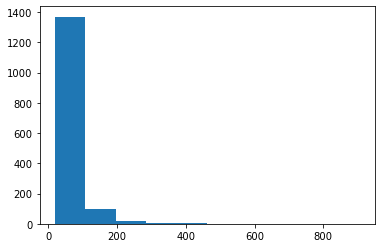

In [7]:
size_range = train["size"]

plt.hist(size_range)
plt.show()

Text(0.5, 1.0, 'pearson correlation')

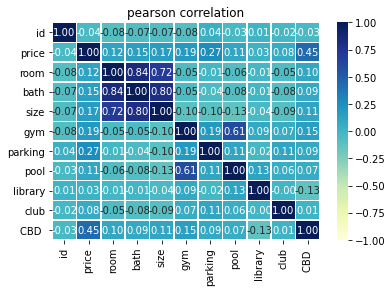

In [8]:
corr_matrix = train.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

# Train a model

In [9]:
x = train.drop(["price", "id"], axis = 1)
y = train["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Evaluate a model

In [10]:
kNR = KNeighborsRegressor()
DTR = DecisionTreeRegressor()
LR = LinearRegression()
LS = Lasso()
EN = ElasticNet()
RFR = RandomForestRegressor()

models = [kNR, DTR, LR, LS, EN, RFR]

In [11]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    print("R2 Score: ", r2_score(y_test,y_pred))
    print("rmse: ", mean_squared_error(y_test,y_pred, squared = False))
    print("---------------------------------------------------------------------------------")


KNeighborsRegressor()
R2 Score:  0.1455505154399107
rmse:  47699.52726030177
---------------------------------------------------------------------------------
DecisionTreeRegressor()
R2 Score:  -0.02973283655718051
rmse:  52364.041666777055
---------------------------------------------------------------------------------
LinearRegression()
R2 Score:  0.2595197525624967
rmse:  44404.56478364132
---------------------------------------------------------------------------------
Lasso()
R2 Score:  0.2595086340303554
rmse:  44404.89815629317
---------------------------------------------------------------------------------
ElasticNet()
R2 Score:  0.15690844305573337
rmse:  47381.439274319615
---------------------------------------------------------------------------------
RandomForestRegressor()
R2 Score:  0.17177971276894588
rmse:  46961.7001191964
---------------------------------------------------------------------------------
